<a href="https://colab.research.google.com/github/jacheung/auto-curator/blob/master/autocurator_CNN_v1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries and set up image libraries in Google drive
import numpy as np
import scipy.io
import tensorflow as tf 
from tensorflow import keras
from sklearn.utils import class_weight
import sklearn.model_selection as ms
from sklearn.metrics import roc_curve     

from google.colab import drive
import glob
import matplotlib.pyplot as plt
from psutil import virtual_memory
import sys
import time
import dill 
import shelve
from keras.preprocessing.image import ImageDataGenerator


# Mount google drive and grab images and labels names 
drive.mount('/content/gdrive')
base_dir = "/content/gdrive/My Drive/Colab data/trialFramesNPY/"
frame_ind_files = glob.glob(base_dir + "*_frameIndex.mat")
T_class = glob.glob(base_dir + "*touchClass.mat")
frames = glob.glob(base_dir + "*dataset.mat")
#                   4/3gEp7zWFwsvd7MRstqM73mJrNwFWCqTFm2a5j3xVvJCGzVG68Ne2Dto

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# 1) Data cleaning


In [3]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

def mem_breakdown_and_big_vars(local_vats):

  mem = virtual_memory()
  mem_free = np.round(mem.free/1024**3, 2)
  tot_mem = np.round(mem.total/1024**3, 2)
  print(str(mem_free) + ' of ' + str(tot_mem) + ' GB of mem')
  for name, size in sorted(((name, sys.getsizeof(value)) for name, value in local_vats.items()),
                          key= lambda x: -x[1])[:10]:
      print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

In [ ]:

mem = virtual_memory()
mem_free = np.round(mem.free/1024**3, 2)
tot_mem = np.round(mem.total/1024**3, 2)
print(str(mem_free) + ' of ' + str(tot_mem) + ' GB of mem')

mem.total

1.06 of 12.72 GB of mem


13653557248

In [ ]:
dmatx, dmaty = my_training_batch_generator.__getitem__(1)
# tmp1 = locals()
mem_breakdown_and_big_vars(globals())
# tmp1.keys()
import sys
from types import ModuleType, FunctionType
from gc import get_referents

# Custom objects know their class.
# Function objects seem to know way too much, including modules.
# Exclude modules as well.
BLACKLIST = type, ModuleType, FunctionType


def getsize(obj):
    """sum size of object & members."""
    if isinstance(obj, BLACKLIST):
        raise TypeError('getsize() does not take argument of type: '+ str(type(obj)))
    seen_ids = set()
    size = 0
    objects = [obj]
    while objects:
        need_referents = []
        for obj in objects:
            if not isinstance(obj, BLACKLIST) and id(obj) not in seen_ids:
                seen_ids.add(id(obj))
                size += sys.getsizeof(obj)
                need_referents.append(obj)
        objects = get_referents(*need_referents)
    return size

getsize(dmatx)

1.06 of 9.58 GB of mem
                   accumulator:  2.2 MiB
                       raw_Y_2: 279.5 KiB
                          tmp1:  9.1 KiB
                   local_vats1:  9.1 KiB
                         predy:  4.5 KiB
                     prob_diff:  4.5 KiB
                           _i9:  3.6 KiB
                          _i59:  3.6 KiB
               frame_ind_files:  2.7 KiB
                       T_class:  2.7 KiB


176

In [ ]:
from __future__ import print_function  # for Python2
import sys

local_vars = list(locals().items())
for var, obj in local_vars:
    print(var, sys.getsizeof(obj))

__name__ 57
__doc__ 113
__package__ 16
__loader__ 16
__spec__ 16
__builtin__ 80
__builtins__ 80
_ih 768
_oh 648
_dh 72
_sh 80
In 768
Out 648
get_ipython 64
exit 56
quit 56
_ 136
__ 28
___ 48
_i 212
_ii 176
_iii 998
_i1 1472
calculate_roc 136
_i2 931
np 80
scipy 80
tf 80
keras 80
class_weight 80
ms 80
roc_curve 136
drive 80
glob 80
plt 80
virtual_memory 136
sys 80
time 80
dill 80
shelve 80
ImageDataGenerator 1056
base_dir 100
frame_ind_files 2720
T_class 2720
frames 2536
_i3 417
frame_nums 2536
T_class_nums 2536
frame_inds 2536
i 28
_i4 890
re 80
extract_between 136
tmp1 9320
sorted_inds 2424
_i5 1060
indices 2536
T_class_reordered 2536
k 32
frame_inds_reordered 2536
_i6 463
raw_Y_set 2536
frame_num_in_Y_set 2536
cnt1 28
tmp2 240
_i7 1010
fux_wit_imgs 136
_i8 888
build_data 136
_i9 3668
My_Custom_Generator 1184
_i10 986
batch_size 28
validate_fraction 24
mixed_inds 96
validate_count 28
T_inds 96
v_inds 96
my_training_batch_generator 56
my_validation_batch_generator 56
_i11 189
image_tra

## 1.1 Matching frames and labels

In [ ]:
# Trim frames and labels names to make the names the same to match them
frame_nums = []
T_class_nums = []
frame_inds = []
for i in range(len(frames)):
  frame_nums.append(frames[i][1:-11])

for i in range(len(T_class)):
  T_class_nums.append(T_class[i][1:-14])
  
for i in range(len(frame_ind_files)):
  frame_inds.append(frame_ind_files[i][1:-14])  
print(frame_inds)

['content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-153_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-154_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-155_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-156_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-157_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-158_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-159_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-160_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-161_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-162_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-163_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-164_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x000000-165_', 'content/gdrive/My Drive/Colab data/trialFramesNPY/AH0000x00000

In [ ]:
# # rearrange frame_nums so that they are in order just for convenience


import re
def extract_between(s, str1, str2):
  result = re.search(str1 + '(.*)' + str2, s)
  return result.group(1)

tmp1 = [int(extract_between(k, '000000-', '_')) for k in frame_nums]
sorted_inds = np.argsort(tmp1)
print(np.max(sorted_inds))
print(np.shape(frame_nums))
frame_nums = [frame_nums[sorted_inds[k]] for k, strings in enumerate(frame_nums)]
frames = [frames[sorted_inds[k]] for k, strings in enumerate(frames)]


tmp1 = [int(extract_between(k, '000000-', '_')) for k in frame_nums]
print(tmp1)
tmp1 = [int(extract_between(k, '000000-', '_')) for k in frames]
print(tmp1)



# print(frame_nums)
# print(frames)

# for k, strings in enumerate(frame_nums):

#   print(k)
#   print(strings)
#   print(sorted_inds[k])
#   frame_nums = strings[sorted_inds[k]]

290
(291,)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

In [ ]:
# Match and reorder all frames and label files
indices = []
T_class_reordered = []
for k in range(len(frame_nums)):
  indices.append([i for i, s in enumerate(T_class_nums) if frame_nums[k] == s])

indices = [x for x in indices if x != []]

for k in range(len(indices)):
    T_class_reordered.append(T_class[indices[k][0]])


#################
indices = []
frame_inds_reordered = []
for k in range(len(frame_nums)):
  indices.append([i for i, s in enumerate(frame_inds) if frame_nums[k] == s])

indices = [x for x in indices if x != []]

for k in range(len(indices)):
    frame_inds_reordered.append(frame_ind_files[indices[k][0]])

#############

# test that this is matched
tmp1 = [int(extract_between(k, '000000-', '_')) for k in T_class_reordered]
print(tmp1)
tmp1 = [int(extract_between(k, '000000-', '_')) for k in frame_nums]
print(tmp1)
tmp1 = [int(extract_between(k, '000000-', '_')) for k in frame_inds_reordered]
print(tmp1)
tmp1 = [int(extract_between(k, '000000-', '_')) for k in frames]
print(tmp1)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [ ]:
# load in labels and count how many data points are in each file. 
# each file represents a trial so for us this could be anywhere between 1 and 4000 data points. 
# most often somewhere between 200-600

raw_Y_set = []
frame_num_in_Y_set = []
for cnt1 in range(len(frames)):
  tmp2 = scipy.io.loadmat(T_class_reordered[cnt1])
  raw_Y_set.append(tmp2['touchClass'])
  frame_num_in_Y_set.append(len(raw_Y_set[cnt1]))

## 1.2 Build Keras Image Generator 
 

In [ ]:
# test_img = dmatx[50, :, :, :]
# num_aug_ims = 100
# tmp1 = fux_wit_imgs(num_aug_ims, test_img)

def fux_wit_imgs(num_aug_ims, test_img):
  datagen = ImageDataGenerator(rotation_range=360, #
                              width_shift_range=.07, #
                              height_shift_range = .07, #
                              shear_range = 30,#
                              zoom_range = .24,
                              brightness_range=[0.75,1.25])#


  samples = np.expand_dims(test_img, 0)
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  all_augment = samples
  for i in range(num_aug_ims):##
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # print(np.shape(all_augment))
    # print(np.shape(np.expand_dims(image, 0)))
    all_augment = np.append(all_augment, np.expand_dims(image, 0), 0)
  np.shape(all_augment)

  return all_augment

In [ ]:
# Function to generate an image tensor and corresponding label array


def build_data(x_files, y_files) :
  to_del = 0
  start = time.time()

  cnt1 = -1;
  mem_free = 9999

  for k in range(len(y_files)):
    cnt1 = cnt1 + 1
    tmp1 = scipy.io.loadmat(x_files[cnt1])
    tmp2 = scipy.io.loadmat(y_files[cnt1])

    Xtmp = tmp1['finalMat']
    Ytmp = tmp2['touchClass']
    if cnt1==0:
      raw_X = Xtmp
      raw_Y = Ytmp
    else:

      raw_X = np.concatenate((raw_X,Xtmp), axis=0)
      raw_Y = np.concatenate((raw_Y,Ytmp), axis=0)
    # if ((time.time() - start) > 10000) or cnt1>=len(x_files)-1:# update every 10 seconds or when loop ends
    #   print(len(x_files))
    #   mem = virtual_memory()
    #   mem_free = mem.free/1024**3;
    #   start = time.time()
    #   print('free mem = ' +  str(mem_free))

  return raw_X, raw_Y



make a custom class to help load in the data to prevent crashing due to over using RAM 
This class will 
- chunk the files based on the total frames contained in them based on "batch_size" variable 


In [ ]:
class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, file_trial_list, file_Y_list, num_in_each, batch_size) :
    cnt = 0
    extract_inds = []
    # num_in_each contains the number of frames in each file I am loading, ie
    # for trial/file 1 there are 200 frames , trial/file 2 has 215 frames etc
    for k, elem in enumerate(num_in_each) :
      tot_frame_nums = sum(num_in_each[cnt: k+1]) # used to test if the number of frames in 
      # all these files exceded the "batch_size" limit 
      if tot_frame_nums>batch_size or len(num_in_each)-1 == k: # condition met, these files together 
      # meet the max requirment to load together as a batch 
        extract_inds.append([cnt, k+1])
        cnt = k+1 # reset to the current iter
        if np.diff(extract_inds[-1]) > 1: # if there is more than one file then we want to take off the last file 
        # because it excedes the set number of frames
          extract_inds[-1][-1] = extract_inds[-1][-1]-1
          cnt = cnt-1
    
    file_list_chunks = []
    file_Y_list_chunks = []
    for i, ii in enumerate(extract_inds):
      file_list_chunks.append(file_trial_list[ii[0]:ii[1]])
      file_Y_list_chunks.append(file_Y_list[ii[0]:ii[1]])


    self.file_trial_list = file_trial_list
    self.file_Y_list = file_Y_list
    self.batch_size = batch_size
    self.extract_inds = extract_inds
    self.num_in_each = num_in_each
    self.file_list_chunks = file_list_chunks
    self.file_Y_list_chunks = file_Y_list_chunks
    
  def __len__(self) :
    return len(self.extract_inds)
  
  def __getitem__(self, num_2_extract) :
    raw_X, raw_Y = build_data(self.file_list_chunks[num_2_extract], 
                          self.file_Y_list_chunks[num_2_extract])

    rgb_batch = np.repeat(raw_X[..., np.newaxis], 3, -1)
    IMG_SIZE = 96 # All images will be resized to 160x160. This is the size of MobileNetV2 input sizes

    rgb_tensor = tf.cast(rgb_batch, tf.float32) # convert to tf tensor with float32 dtypes
    rgb_tensor = (rgb_tensor/127.5) - 1 # /127.5 = 0:2, -1 = -1:1 requirement for mobilenetV2
    rgb_tensor = tf.image.resize(rgb_tensor, (IMG_SIZE, IMG_SIZE)) # resizing

    self.IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
    rgb_tensor_aug = rgb_tensor
    # print(len(raw_Y))
    # for i, ims in enumerate(rgb_tensor):
    #   # print(i)
    #   tmp1 = fux_wit_imgs(20, ims)
    #   rgb_tensor_aug = np.append(rgb_tensor_aug, tmp1, 0)
    return rgb_tensor_aug, raw_Y

  def get_single_trials(self, num_2_extract) :
      raw_X, raw_Y = build_data([self.file_trial_list[num_2_extract]], 
                            [self.file_Y_list[num_2_extract]])
    
      frame_index = scipy.io.loadmat(self.frame_ind_list[num_2_extract])
      frame_index = frame_index['relevantIdx']
      frame_index = frame_index[0]
      rgb_batch = np.repeat(raw_X[..., np.newaxis], 3, -1)
      IMG_SIZE = 96 # All images will be resized to 160x160. This is the size of MobileNetV2 input sizes

      rgb_tensor = tf.cast(rgb_batch, tf.float32) # convert to tf tensor with float32 dtypes
      rgb_tensor = (rgb_tensor/127.5) - 1 # /127.5 = 0:2, -1 = -1:1 requirement for mobilenetV2
      rgb_tensor = tf.image.resize(rgb_tensor, (IMG_SIZE, IMG_SIZE)) # resizing

      self.IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
      rgb_tensor_aug = rgb_tensor
      # print(len(raw_Y))
      # for i, ims in enumerate(rgb_tensor):
      #   print(i)
      #   tmp1 = fux_wit_imgs(20, ims)
      #   rgb_tensor_aug = np.append(rgb_tensor_aug, tmp1, 0)
      return rgb_tensor_aug, raw_Y
    
      # return rgb_tensor, raw_Y, frame_index#, trial_file_num

In [ ]:
# Data splits to train/test/validation sets 

# *** need to get actual data split here
batch_size = 2000
validate_fraction = .3

# for now we will split based on num files not number of frames becasue its easier and shouldnt make
#  too much of a difference -- can fix later if we care to 
mixed_inds = np.random.choice(len(frames), len(frames), replace=False)
validate_count = round(validate_fraction*len(frames))
T_inds = mixed_inds[validate_count+1:-1]
# T_inds = [frames[k] for k in T_inds]
v_inds = mixed_inds[0:validate_count]
# v_inds = [frames[k] for k in v_inds]

my_training_batch_generator = My_Custom_Generator([frames[k] for k in T_inds], [T_class_reordered[k] for k in T_inds],[frame_num_in_Y_set[k] for k in T_inds],  batch_size)
my_validation_batch_generator = My_Custom_Generator([frames[k] for k in v_inds], [T_class_reordered[k] for k in v_inds],[frame_num_in_Y_set[k] for k in v_inds],  batch_size)
print(len(frames))


291


#2) Exploratory Data Analysis

We're going to take a look at the distribution of classes and some sample images in randomly selected batches to ensure data quality.  

In [ ]:
# image transform from [-1 1] back to [0 255] for imshow
def image_transform(x):
  image = tf.cast((x + 1) * 127.5, tf.uint8)
  return image

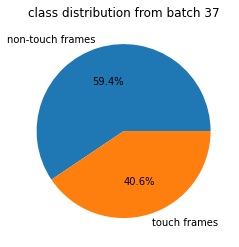

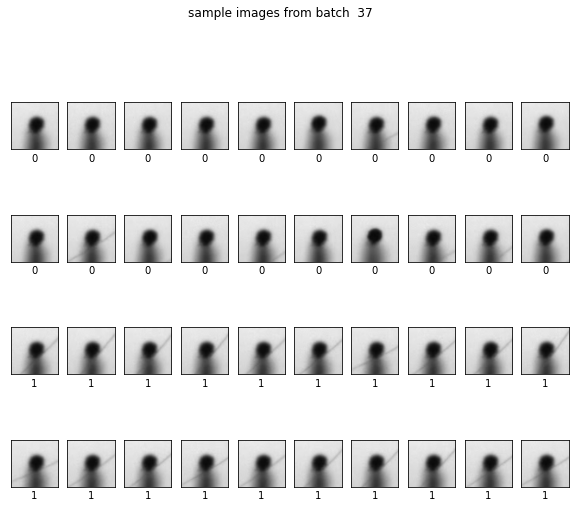

In [ ]:
# randomly select a batch and generate images and labels
batch_num = np.random.choice(np.arange(0,len(my_training_batch_generator.file_list_chunks)))
samp_x, samp_y = my_training_batch_generator.__getitem__(batch_num)

# look at the distribution of classes
plt.pie([1-np.mean(samp_y), np.mean(samp_y)],
        labels=['non-touch frames', 'touch frames'], autopct='%1.1f%%',)
plt.title('class distribution from batch ' + str(batch_num))
plt.show()

# generate indices for positive and negative classes
images_to_sample = 20
neg_class = [i for i, val in enumerate(samp_y) if val==0]
pos_class = [i for i, val in enumerate(samp_y) if val==1]
neg_index = np.random.choice(neg_class,images_to_sample)
pos_index = np.random.choice(pos_class,images_to_sample)

# plot sample positive and negative class images
plt.figure(figsize=(10,10))
for i in range(images_to_sample):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    _ = plt.imshow(image_transform(samp_x[neg_index[i]]))
    plt.xlabel('0')

    plt.subplot(5,10,images_to_sample+i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_transform(samp_x[pos_index[i]]))
    plt.xlabel('1')
plt.suptitle('sample images from batch  ' + str(batch_num))
plt.show()

In [ ]:
# population distribution of data
batch_size = 2000
all_data_batch_generator = My_Custom_Generator(frames, T_class_reordered, frame_num_in_Y_set,  batch_size)
accumulator = []
x_y = []

for b in np.arange(0,len(all_data_batch_generator.file_list_chunks)):
  samp_x, samp_y = all_data_batch_generator.__getitem__(b)
  accumulator.append(len(samp_x))
  x_y.append([1-np.mean(samp_y), np.mean(samp_y)])

population = np.mean(np.array(x_y),axis=0)
plt.pie(population,
        labels=['non-touch frames', 'touch frames'], autopct='%1.1f%%',)
plt.title('class distribution across population (n=' + str(np.sum(accumulator)) + ' frames)')
plt.show()

KeyboardInterrupt: ignored

# 3) Feature engineering?


In [ ]:
# Y vectorization and class weight calculation 
to_del = 0
start = time.time()

cnt1 = -1;
mem_free = 9999
y_files = my_training_batch_generator.file_Y_list
for k in range(len(y_files)):
  cnt1 = cnt1 + 1
  tmp2 = scipy.io.loadmat(y_files[cnt1])

  Ytmp = tmp2['touchClass']
  if cnt1==0:
    raw_Y_2 = Ytmp
  else:
    raw_Y_2 = np.concatenate((raw_Y_2,Ytmp), axis=0)


# 4) Deploy and selection of base model
In this section we're going to use MobileNetV2 as the base model.
We're going to run two variations of the model.  
a. basemodel with frozen layers and output classifer changes   
b. basemodel with final 100 layers unfrozen to optimize prediction 


In [ ]:
# Create base model 

# First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the include_top=False argument, 
# you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction

# Create the base model from the pre-trained model MobileNet V2
IMG_SIZE = 96 # All images will be resized to 160x160. This is the size of MobileNetV2 input sizes
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

feature_batch = base_model.output
print(feature_batch.shape)

# Adding Classification head
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

# Model Stacking
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

print(model.summary())

# Compile model with specific metrics
# Metrics below are for evaluating imbalanced datasets
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name = 'auc')
]

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

mem_breakdown_and_big_vars(locals())

(None, 3, 3, 1280)
(None, 1280)
(None, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Functio (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________
None
9.53 of 12.05 GB of mem
                       raw_Y_2: 279.5 KiB
                   local_vats1:  9.1 KiB
                           _i9:  3.6 KiB
                          _i59:  3.6 KiB
               frame_ind_files:  2.7 KiB
                       T_class:  2.7 KiB
                        frames:  2.5 KiB
           

In [ ]:
start = time.time()

# Fit model with a couple parameters
EPOCHS = 40

# Class imbalance weighting
rebalance = class_weight.compute_class_weight('balanced',
                                  [0, 1], raw_Y_2.flatten())
class_weights = {i : rebalance[i] for i in range(2)}

# Early stopping 
callbacks = [keras.callbacks.EarlyStopping (monitor = 'val_loss',
                                            patience = 2)]

history = model.fit(my_training_batch_generator, epochs=EPOCHS,
              validation_data= my_validation_batch_generator,
              callbacks = callbacks,
              class_weight = class_weights)


total_seconds = time.time() - start
print('total time took ' + str(round(total_seconds/60)), ' minutes')

Epoch 1/40
157/157 [==============================] - 393s 3s/step - loss: 0.6898 - tp: 37726.0000 - fp: 108017.0000 - tn: 121598.0000 - fn: 22013.0000 - precision: 0.2589 - recall: 0.6315 - auc: 0.5896 - val_loss: 0.5197 - val_tp: 22944.0000 - val_fp: 12885.0000 - val_tn: 76942.0000 - val_fn: 4552.0000 - val_precision: 0.6404 - val_recall: 0.8344 - val_auc: 0.9200
Epoch 2/40
157/157 [==============================] - 108s 686ms/step - loss: 0.4532 - tp: 52922.0000 - fp: 37363.0000 - tn: 192252.0000 - fn: 6817.0000 - precision: 0.5862 - recall: 0.8859 - auc: 0.9398 - val_loss: 0.3554 - val_tp: 27017.0000 - val_fp: 9982.0000 - val_tn: 79845.0000 - val_fn: 479.0000 - val_precision: 0.7302 - val_recall: 0.9826 - val_auc: 0.9736
Epoch 3/40
157/157 [==============================] - 107s 682ms/step - loss: 0.3371 - tp: 57926.0000 - fp: 29797.0000 - tn: 199818.0000 - fn: 1813.0000 - precision: 0.6603 - recall: 0.9697 - auc: 0.9678 - val_loss: 0.2614 - val_tp: 27045.0000 - val_fp: 7542.0000 -

In [ ]:
# model.save('/content/gdrive/My Drive/Colab data/model_200906_400_000_imgs_2.h5')


# model.load_weights('/content/gdrive/My Drive/Colab data/model_200906_400_000_imgs.h5')


None


## 4.1) Model learning evaluation 

Here we'll look at metrics of loss, AUC, precision, and recall across epochs of learning 

 

AttributeError: ignored

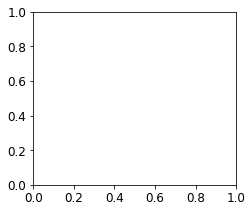

In [ ]:
# Overall model evaluation
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  fig = plt.figure(figsize=(8, 7))
  plt.rcParams.update({'font.size':12})
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1.1])

    plt.legend()
    plt.tight_layout()

plot_metrics(history)

array([[0.20312489, 0.04257069],
       [0.00333156, 0.75097286]])

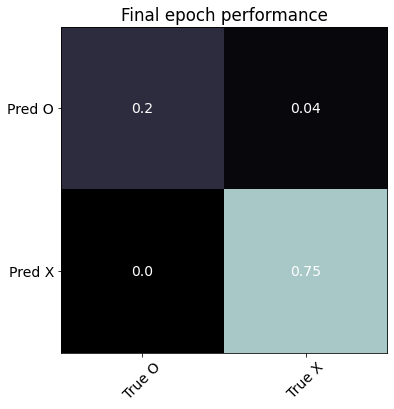

In [ ]:
# Confusion matrix last epoch 
def plot_confusion_matrix(history, epoch):
  fig = plt.figure(figsize = (6,6))
  plt.rcParams.update({'font.size':14})
  plt.tight_layout()

  total_samples= history.history['tp'][epoch] + history.history['fp'][epoch] + history.history['tn'][epoch] + history.history['fn'][epoch]
  values = np.array([[history.history['tp'][epoch], history.history['fp'][epoch]],
                      [history.history['fn'][epoch], history.history['tn'][epoch]]]) / total_samples
  for i in range(2):
      for j in range(2):
          text = plt.text(j, i, round(values[i, j],2),
                        ha="center", va="center", color="w")

  im = plt.imshow(values,cmap='bone',vmin=0, vmax=1)
  plt.yticks([0,1],labels=['Pred O', 'Pred X'])
  plt.xticks([0,1],labels = ['True O', 'True X'],rotation=45)
  plt.title('Final epoch performance')
  plt.show
  return values

plot_confusion_matrix(history,-1)

In [ ]:
  dmatx, dmaty = my_training_batch_generator.__getitem__(0)


9.48 of 12.01 GB of mem
                       raw_Y_2: 279.5 KiB
                          tmp1:  9.1 KiB
                   local_vats1:  9.1 KiB
                           _i9:  3.6 KiB
                          _i59:  3.6 KiB
               frame_ind_files:  2.7 KiB
                       T_class:  2.7 KiB
                        frames:  2.5 KiB
                    frame_nums:  2.5 KiB
                  T_class_nums:  2.5 KiB
7.22 of 10.68 GB of mem
                       raw_Y_2: 279.5 KiB
                   accumulator: 15.5 KiB
                          tmp1:  9.1 KiB
                   local_vats1:  9.1 KiB
                         predy:  7.8 KiB
                     prob_diff:  7.8 KiB
                           _i9:  3.6 KiB
                          _i59:  3.6 KiB
               frame_ind_files:  2.7 KiB
                       T_class:  2.7 KiB
6.86 of 10.35 GB of mem
                       raw_Y_2: 279.5 KiB
                   accumulator: 37.4 KiB
                       

<function matplotlib.pyplot.show>

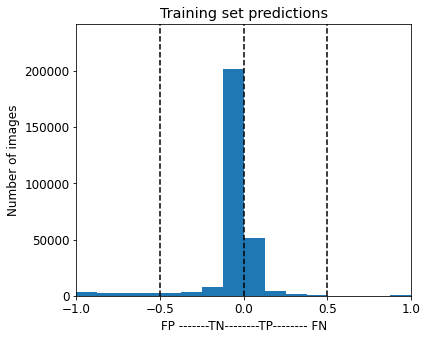

In [ ]:
# load all validation data and get distribution of probability differences
accumulator = np.array([])
for batch_num in np.arange(0,len(my_training_batch_generator.file_list_chunks)):
  dmatx, dmaty = my_training_batch_generator.__getitem__(batch_num)
  mem_breakdown_and_big_vars(locals())
  # predict using the trained model and calculate difference from target
  # prob_diff: positive values are false negatives, negative values are false positives 
  predy = model.predict(dmatx)
  prob_diff = dmaty - predy
  accumulator = np.concatenate((accumulator,prob_diff[:,0]))

plt.figure(figsize=(6,5))
plt.xlim([-1, 1])
plt.xticks(np.linspace(-1,1,5))
plt.xlabel('FP -------TN--------TP-------- FN')
plt.ylabel('Number of images')
plt.title('Training set predictions')
l = plt.hist(accumulator,bins=np.linspace(-1,1,17))
for k in np.array([-.5,0,.5]):
  plt.plot([k, k],[0, max(l[0])*1.2],color='k',linestyle='--')
plt.ylim([0, max(l[0])*1.2])
plt.show

In [ ]:
# ROC Analysis

def calculate_roc(batch_generator):
  y_pred = np.array([])
  y_true = np.array([])

  for batch_num in np.arange(0,len(batch_generator.file_list_chunks)):
    dmat_x, dmat_y = batch_generator.__getitem__(batch_num)
    # predict using the trained model and calculate difference from target
    # prob_diff: positive values are false negatives, negative values are false positives 
    pred_y = model.predict(dmat_x)
    y_true = np.concatenate((y_true, dmat_y[:,0]))
    y_pred = np.concatenate((y_pred,pred_y[:,0]))

  fpr, tpr, thresholds = roc_curve(y_true, y_pred)

  return fpr, tpr, thresholds

train_fp, train_tp, train_thresh = calculate_roc(my_training_batch_generator)
val_fp, val_tp, val_thresh = calculate_roc(my_validation_batch_generator)

fig,axs = plt.subplots(2,1,figsize=(4,6))
axs[0].plot(train_fp,train_tp,color = 'b',label = 'train')
axs[0].plot(val_fp,val_tp, color = 'b', linestyle="--", label = 'val')
axs[0].set_xlabel('False positive rate (%)')
axs[0].set_ylabel('True positive rate (%)')

axs[1].plot(train_fp,train_tp,color = 'b',label = 'train')
axs[1].plot(val_fp,val_tp, color = 'b', linestyle="--", label = 'val')
axs[1].set_ylim(.9, 1.01)
axs[1].set_xlim(0, .1)
axs[1].set_xticks([0, .3])
axs[1].set_yticks([.7, 1])
axs[1].set_title('zoomed')
axs[1].set_xlabel('False positive rate (%)')
axs[1].set_ylabel('True positive rate (%)')

plt.tight_layout()
plt.legend()
plt.show

NameError: ignored

## 4.2) Model evaluation of failed images

Here we'll plot 10 images of the False Positive and False Negative cases in each batch. This will help us see what the extreme cases of false negatives and false positives are. 

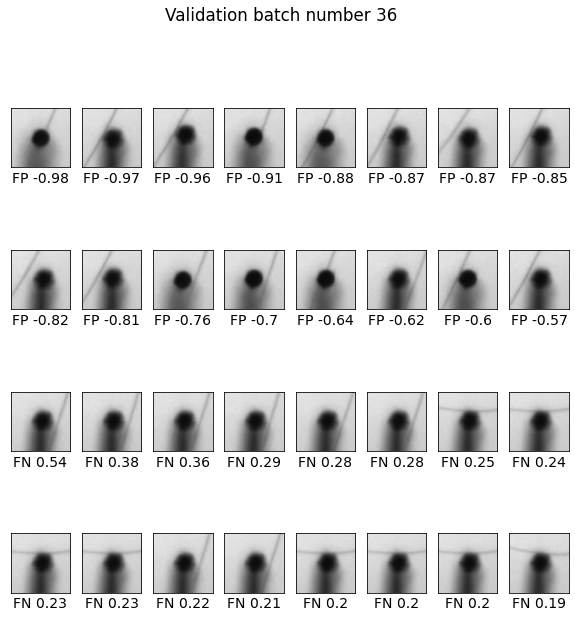

In [ ]:
# load a batch of data
batch_num = np.random.choice(np.arange(0,len(my_validation_batch_generator.file_list_chunks)))
dmatx, dmaty = my_validation_batch_generator.__getitem__(batch_num)

# predict using the trained model and calculate difference from target
# prob_diff: positive values are false negatives, negative values are false positives 
predy = model.predict(dmatx)
prob_diff = dmaty - predy

# sorted indices and values for plotting
idx = np.argsort(prob_diff.flatten())
values = np.sort(prob_diff.flatten()).round(2)

images_to_sample = 16

plt.figure(figsize=(10,10))
for i in range(images_to_sample):
    plt.subplot(4,images_to_sample/2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    _ = plt.imshow(image_transform(dmatx[idx[i]]))
    plt.xlabel('FP ' + str(values[i]))

    plt.subplot(4,images_to_sample/2,images_to_sample+i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_transform(dmatx[idx[-i -1]]))
    plt.xlabel('FN ' + str(values[-i -1]))

plt.suptitle('Validation batch number ' + str(batch_num))
plt.show()



# 5) Hyperparameter tuning 
 Here we'll loosen up a couple of the top layers for training to see if we can boost performance 

"In most convolutional networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, rather than overwrite the generic learning"

In [ ]:
# Fine-tuning model by unfreezing layers and allowing them to be trainable

model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 50

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable =  False

# Compile model with specific metrics
# Metrics below are for evaluating imbalanced datasets
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name = 'auc')
]

# compile model with a much slower learning rate 
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)


Number of layers in the base model:  3


In [ ]:
start = time.time()

# Fit model with a couple parameters
EPOCHS = 20

# Class imbalance weighting
rebalance = class_weight.compute_class_weight('balanced',
                                  [0, 1], raw_Y_2.flatten())
class_weights = {i : rebalance[i] for i in range(2)}

# Early stopping 
callbacks = [keras.callbacks.EarlyStopping (monitor = 'val_loss',
                                            patience = 2)]

history = model.fit(my_training_batch_generator, epochs=EPOCHS,
              validation_data= my_validation_batch_generator,
              callbacks = callbacks,
              class_weight = class_weights)

total_seconds = time.time() - start
print('total time took ' + str(round(total_seconds/60)), ' minutes')

Epoch 1/20
155/155 [==============================] - 86s 554ms/step - loss: 0.1233 - tp: 58560.0000 - fp: 12586.0000 - tn: 209167.0000 - fn: 783.0000 - precision: 0.8231 - recall: 0.9868 - auc: 0.9898 - val_loss: 0.1665 - val_tp: 28208.0000 - val_fp: 6905.0000 - val_tn: 91002.0000 - val_fn: 456.0000 - val_precision: 0.8033 - val_recall: 0.9841 - val_auc: 0.9861
Epoch 2/20
155/155 [==============================] - 84s 544ms/step - loss: 0.1233 - tp: 58560.0000 - fp: 12586.0000 - tn: 209167.0000 - fn: 783.0000 - precision: 0.8231 - recall: 0.9868 - auc: 0.9898 - val_loss: 0.1665 - val_tp: 28208.0000 - val_fp: 6905.0000 - val_tn: 91002.0000 - val_fn: 456.0000 - val_precision: 0.8033 - val_recall: 0.9841 - val_auc: 0.9861
Epoch 3/20
155/155 [==============================] - 85s 548ms/step - loss: 0.1233 - tp: 58560.0000 - fp: 12586.0000 - tn: 209167.0000 - fn: 783.0000 - precision: 0.8231 - recall: 0.9868 - auc: 0.9898 - val_loss: 0.1665 - val_tp: 28208.0000 - val_fp: 6905.0000 - val_tn

# ---- DONE ---- 

In [ ]:
dmatx, dmaty = my_validation_batch_generator.get_single_trials(1)
# print(osd[0])
# 

UnboundLocalError: ignored

In [ ]:
# test_img = dmatx[50, :, :, :]
# num_aug_ims = 100
# tmp1 = fux_wit_imgs(num_aug_ims, test_img)
# np.shape(tmp1)

(101, 96, 96, 3)

In [ ]:
# np.concatenate(all_augment, np.expand_dims(image, 0), 1)

tmp1 = np.append(all_augment, np.expand_dims(image, 0), 0)
np.shape(tmp1)

(2, 96, 96, 3)

In [ ]:
test_img = dmatx[50:52, :, :, :]
test_img = (test_img+1)/2*255

# example of random rotation image augmentation
from keras.preprocessing.image import ImageDataGenerator
# load the image
data = test_img
# # convert to numpy array
# data = img_to_array(img)
# expand dimension to one sample
print(np.shape(data))

samples = np.expand_dims(data, 0)
print(np.shape(samples))

samples = data
print(np.shape(samples))

# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=360, #
                             width_shift_range=.07, #
                             height_shift_range = .07, #
                             shear_range = 30,#
                             zoom_range = .24,
                             brightness_range=[0.75,1.25])#
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
plt.figure(figsize=(20,20))

for i in range(50):
	# define subplot
	plt.subplot(5, 10, i+1)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()
np.shape(image)

TypeError: ignored

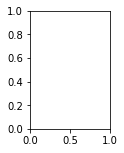

In [ ]:
# print(np.shape())
# print(96/2)
test_img = dmatx[39, :, :, :]


test_img = (test_img+1)/2
# print(np.max(test_img))
# print(np.min(test_img))
images_to_sample = 12
plt.figure(figsize=(10,10))

for i in range(images_to_sample):

  plt.subplot(4,images_to_sample/2,i+1)
  tmp1 = tf.keras.preprocessing.image.random_rotation(
      test_img,1, row_axis=48, col_axis=48, channel_axis=0, fill_mode='nearest', cval=0.0,
      interpolation_order=1
  )
  if i == 0:
    plt.imshow(test_img)
  else:
    plt.imshow(tmp1)

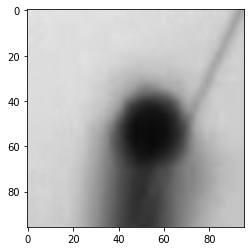

In [ ]:
    plt.imshow(test_img)


In [ ]:
data_augmentation = keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.25),
])

# augmented_image = data_augmentation(tf.expand_dims(img, 0), training=True)
# show(img,augmented_image[0].numpy())

NameError: ignored

In [ ]:
class_predict = []
is_val_data = []
for n, trial_name in enumerate(my_validation_batch_generator.file_trial_list):
  # print(n)
  dmatx, dmaty = my_validation_batch_generator.get_single_trials(n)
  tmp1= model.predict(dmatx)
  class_predict.append(tmp1)
  is_val_data.append(1)
for n, trial_name in enumerate(my_training_batch_generator.file_trial_list):
  # print(n)
  dmatx, dmaty = my_training_batch_generator.get_single_trials(n)
  tmp1= model.predict(dmatx)
  class_predict.append(tmp1)
  is_val_data.append(0)


In [ ]:
all_files = my_validation_batch_generator.file_trial_list + my_training_batch_generator.file_trial_list
tmp1 = [all_files, class_predict, is_val_data]
scipy.io.savemat('/content/gdrive/My Drive/Colab data/all_pred_200828_1.mat', mdict={'my_list': tmp1})

In [ ]:



filename='/content/gdrive/My Drive/Colab data/allSaveData200828_2.out'
my_shelf = shelve.open(filename,'n') # 'n' for new
# dont_save_vars = ['exit', 'get_ipython']
dont_save_vars = ['In', 'Out', '_', '_1', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_ih', '_ii', '_iii', '_oh', '_sh', 'exit', 'get_ipython', 'quit']
for key in dir():
  if all([key != k for k in dont_save_vars]):
    try:
      my_shelf[key] = globals()[key]
    except TypeError:
      #
      # __builtins__, my_shelf, and imported modules can not be shelved.
      #
      print('ERROR shelving: {0}'.format(key))
      # print('ERROR')
my_shelf.close()

ERROR shelving: METRICS
ERROR shelving: base_model
ERROR shelving: callbacks
ERROR shelving: class_weight
ERROR shelving: drive
ERROR shelving: feature_batch
ERROR shelving: feature_batch_average
ERROR shelving: glob
ERROR shelving: global_average_layer
ERROR shelving: history
ERROR shelving: keras
ERROR shelving: model
ERROR shelving: ms
ERROR shelving: my_shelf
ERROR shelving: np
ERROR shelving: plt
ERROR shelving: prediction_batch
ERROR shelving: prediction_layer
ERROR shelving: scipy
ERROR shelving: shelve
ERROR shelving: sys
ERROR shelving: tf
ERROR shelving: time


In [ ]:
                      #pip install dill --user
filename = '/content/gdrive/My Drive/Colab data/globalsave.pkl'
dill.dump_session(filename)

# and to load the session again:
dill.load_session(filename)

In [ ]:
filename = 'globalsave.pkl'
dill.dump_session(filename)

# and to load the session again:
dill.load_session(filename)

TypeError: ignored

In [ ]:
model.save('/content/gdrive/My Drive/Colab data/model_200828_1.h5')
